# Importing Libraries and Modules

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

### Loading Dataset using pandas library

In [3]:
Spam_Data = pd.read_csv(r'C:\Users\SS\Downloads\MDS Course files\Data set\sms_spam.csv')

Printing Data set

In [4]:
Spam_Data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


### Shape of the dataset

In [5]:
print(f"Number of rows in dataset is {Spam_Data.shape[0]}.\nNumber of columns in dataset is {Spam_Data.shape[1]}.")

Number of rows in dataset is 5559.
Number of columns in dataset is 2.


### Grouping

We group them o9n the basis of their types.

In [7]:
Grpd_data = Spam_Data.groupby('type')

**Statistical Information of the Grouped Data**

In [9]:
Grpd_data.describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4812   4503                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

### Length Column
New Length column contain length of the text.

In [10]:
Spam_Data['length'] = Spam_Data['text'].apply(len)

In [11]:
Spam_Data.head(2)

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23


In [15]:
Spam_Data.length.describe()

count    5559.000000
mean       79.781436
std        59.105497
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

# Visualization

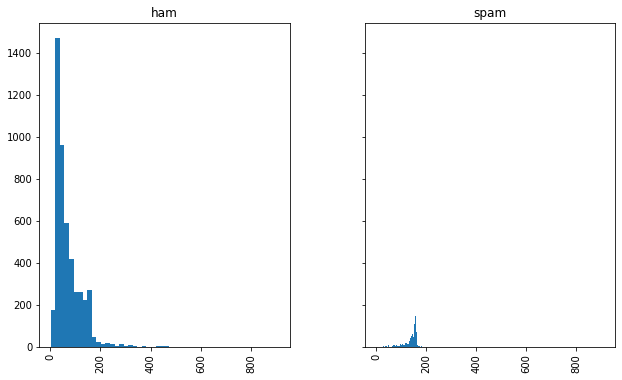

In [27]:
Spam_Data.hist(column='length',bins=50, by='type', sharex=True, sharey=True, figsize=[10,6])
plt.show()

# Text Mining or Text Cleaning

We remove Punctuations and Stop words from the text

In [29]:
# Importng stop words
stop_words = stopwords.words('english')

### Function to clean text

In [32]:
def clean_text(text):
    no_punc_txt = [s for s in text if s not in string.punctuation]
    no_punc_txt = ''.join(no_punc_txt)
    rm_words = [w for w in no_punc_txt.split() if w.lower() not in stop_words]
    return ' '.join(rm_words)

**Calling Function on the Dataset**

In [33]:
Spam_Data.text = Spam_Data.text.apply(clean_text)

**Dataset after removing Punctuations and stopwords**

In [34]:
Spam_Data.head()

,type,text,length
0,ham,Hope good week checking,49
1,ham,Kgive back thanks,23
2,ham,also cbe pay,43
3,spam,complimentary 4 STAR Ibiza Holiday £10000 cash...,149
4,spam,okmail Dear Dave final notice collect 4 Teneri...,161


### Creating Bag of Words
Bag of words means frequency of the words 

In [35]:
bag_of_words = CountVectorizer()
bag_of_words.fit(Spam_Data['text'])
bag_of_words.vocabulary_

{'hope': 4185,
 'good': 3798,
 'week': 8946,
 'checking': 2123,
 'kgive': 4724,
 'back': 1458,
 'thanks': 8188,
 'also': 1158,
 'cbe': 2050,
 'pay': 6199,
 'complimentary': 2335,
 'star': 7759,
 'ibiza': 4304,
 'holiday': 4155,
 '10000': 293,
 'cash': 2028,
 'needs': 5704,
 'urgent': 8669,
 'collection': 2285,
 '09066364349': 260,
 'landline': 4845,
 'lose': 5084,
 'box434sk38wp150ppm18': 1771,
 'okmail': 5967,
 'dear': 2649,
 'dave': 2621,
 'final': 3403,
 'notice': 5842,
 'collect': 2282,
 'tenerife': 8149,
 '5000': 688,
 'award': 1426,
 'call': 1934,
 '09061743806': 222,
 'tcs': 8103,
 'sae': 7088,
 'box326': 1763,
 'cw25wx': 2564,
 '150ppm': 374,
 'aiya': 1107,
 'discuss': 2836,
 'later': 4873,
 'lar': 4858,
 'pick': 6294,
 'much': 5593,
 'buzy': 1909,
 'please': 6353,
 'ask': 1341,
 'mummy': 5608,
 'father': 3333,
 'marvel': 5267,
 'mobile': 5486,
 'play': 6342,
 'official': 5943,
 'ultimate': 8579,
 'spiderman': 7681,
 'game': 3657,
 '450': 640,
 'ur': 8666,
 'right': 6978,
 'tex

In [45]:
print("Number of different words used in all text are", len(bag_of_words.vocabulary_) , '.')

Number of different words used in all text are 9385 .


# Making Matrix of text and bag of words

In [37]:
txt_transform = bag_of_words.transform(Spam_Data.text)
print(txt_transform.shape)

(5559, 9385)


# Classification
We use Multinomial Naive Bayes Classifier from scikit-learn library

**Importing Multinomial Naive Bayes Classifier**

In [50]:
from sklearn.naive_bayes import MultinomialNB 

In [52]:
# Making Model
MNB_classifier = MultinomialNB()

**Fitting all text to the Classifier**

In [53]:
MNB_classifier.fit(txt_transform,Spam_Data.type)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
accuracy_score

# Validation of the Classifier

Let us condsider a text from the data set as new meassage and check if it predict same result as given one or not.

In [55]:
new_txt = Spam_Data.iloc[4][1]

In [56]:
new_txt

'okmail Dear Dave final notice collect 4 Tenerife Holiday 5000 CASH award Call 09061743806 landline TCs SAE Box326 CW25WX 150ppm'

### Function for prediciting type of text

In [61]:
def ham_spam(text):
    test = bag_of_words.transform([text])
    print(MNB_classifier.predict(test))
    

**Calling the function**

In [62]:
ham_spam(new_txt)

['spam']


# From this we can see it is predicting the same type of the text as given. This implies Accuracy of our classifier is good and it can be used to predict HAM or SPAM in the text.